## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
%matplotlib inline

In [2]:
tqdm.pandas()
df = pd.read_csv("../data/train.csv")
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [3]:
df.isnull().sum()/len(df)*100

timestamp    0.000000
Asset_ID     0.000000
Count        0.000000
Open         0.000000
High         0.000000
Low          0.000000
Close        0.000000
Volume       0.000000
VWAP         0.000037
Target       3.095862
dtype: float64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()/len(df)*100

timestamp    0.0
Asset_ID     0.0
Count        0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Volume       0.0
VWAP         0.0
Target       0.0
dtype: float64

In [6]:
assets=pd.read_csv('../data/asset_details.csv',index_col=0).sort_index()

In [7]:
assets

,Weight,Asset_Name
Asset_ID,,
0,4.304065,Binance Coin
1,6.779922,Bitcoin
2,2.397895,Bitcoin Cash
3,4.406719,Cardano
4,3.555348,Dogecoin
5,1.386294,EOS.IO
6,5.894403,Ethereum
7,2.079442,Ethereum Classic
8,1.098612,IOTA


In [8]:
df["Weight"]=df['Asset_ID'].progress_apply(lambda x: assets.loc[x,"Weight"])

100%|██████████| 23486465/23486465 [02:19<00:00, 168749.63it/s]


C:\Users\Ashwin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Asset_ID', ylabel='count'>

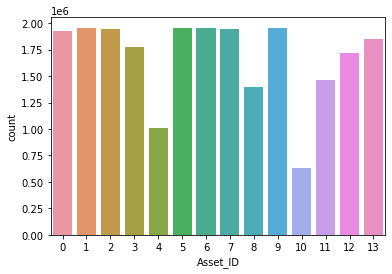

In [9]:
sns.countplot(df['Asset_ID'])

We seem to have very few samples for DogeCoin(4) and Maker(10). The rest seem more or less equally balanced with slight variations.

In [10]:
supp_df=pd.read_csv("../data/supplemental_train.csv")

In [11]:
supp_df[supp_df['timestamp'] == 1623542400]


,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1623542400,3,1201.0,1.478556,1.486030,1.478000,1.483681,6.547996e+05,1.481439,-0.002594
1,1623542400,2,1020.0,580.306667,583.890000,579.910000,582.276667,1.227988e+03,581.697038,-0.009143
2,1623542400,0,626.0,343.789500,345.108000,343.640000,344.598000,1.718833e+03,344.441729,-0.004525
3,1623542400,1,2888.0,35554.289632,35652.464650,35502.670000,35602.004286,1.638115e+02,35583.469303,0.003096
4,1623542400,4,433.0,0.312167,0.312600,0.311920,0.312208,5.855774e+05,0.312154,0.001426
5,1623542400,5,359.0,4.832550,4.845900,4.822900,4.837583,4.714355e+04,4.836607,-0.000579
6,1623542400,7,541.0,55.223080,55.494000,55.182000,55.344680,6.625202e+03,55.298816,-0.003998
7,1623542400,6,2186.0,2371.194286,2379.200000,2369.670000,2374.380714,1.214129e+03,2374.335307,0.002565
8,1623542400,8,35.0,1.003150,1.019800,0.987300,1.003300,7.061928e+03,1.002936,-0.005097
9,1623542400,9,560.0,161.933429,162.480000,161.730000,162.214714,1.485009e+03,162.231310,0.000686


In [12]:
df[df['timestamp'] == 1623542400]


,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight
22221694,1623542400,3,1201.0,1.478556,1.486030,1.478000,1.483681,6.547996e+05,1.481439,-0.002594,4.406719
22221695,1623542400,2,1020.0,580.306667,583.890000,579.910000,582.276667,1.227988e+03,581.697038,-0.009143,2.397895
22221696,1623542400,0,626.0,343.789500,345.108000,343.640000,344.598000,1.718833e+03,344.441729,-0.004525,4.304065
22221697,1623542400,1,2888.0,35554.289632,35652.464650,35502.670000,35602.004286,1.638115e+02,35583.469303,0.003096,6.779922
22221698,1623542400,4,433.0,0.312167,0.312600,0.311920,0.312208,5.855774e+05,0.312154,0.001426,3.555348
22221699,1623542400,5,359.0,4.832550,4.845900,4.822900,4.837583,4.714355e+04,4.836607,-0.000579,1.386294
22221700,1623542400,7,541.0,55.223080,55.494000,55.182000,55.344680,6.625202e+03,55.298816,-0.003998,2.079442
22221701,1623542400,6,2186.0,2371.194286,2379.200000,2369.670000,2374.380714,1.214129e+03,2374.335307,0.002565,5.894403
22221702,1623542400,8,35.0,1.003150,1.019800,0.987300,1.003300,7.061928e+03,1.002936,-0.005097,1.098612
22221703,1623542400,9,560.0,161.933429,162.480000,161.730000,162.214714,1.485009e+03,162.231310,0.000686,2.397895


From the above comparison it is quite obvious that the data of `supplemental_train.csv` has been sampled directly from `train.csv`. The documentation mentions this and has stated that after the submission period is over this file's data will be replaced with cryptoasset prices from the submission period. In the Evaluation phase, the train, train supplement, and test set will be contiguous in time, apart from any missing data. The current copy, which is just filled approximately the right amount of data from train.csv is provided as a placeholder.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486465 entries, 0 to 24236581
Data columns (total 11 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  int64  
 1   Asset_ID   int64  
 2   Count      float64
 3   Open       float64
 4   High       float64
 5   Low        float64
 6   Close      float64
 7   Volume     float64
 8   VWAP       float64
 9   Target     float64
 10  Weight     float64
dtypes: float64(9), int64(2)
memory usage: 2.1 GB


In [14]:
df.describe()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight
count,2.348646e+07,2.348646e+07,2.348646e+07,2.348646e+07,2.348646e+07,2.348646e+07,2.348646e+07,2.348646e+07,2.348646e+07,2.348646e+07,2.348646e+07
mean,1.577541e+09,6.224257e+00,2.954028e+02,1.476051e+03,1.479876e+03,1.472882e+03,1.476050e+03,2.947317e+05,NaN,7.121863e-06,3.069216e+00
std,3.333367e+07,4.099476e+00,8.796244e+02,6.119951e+03,6.129966e+03,6.110473e+03,6.119956e+03,2.471421e+06,NaN,5.679042e-03,1.772533e+00
min,1.514765e+09,0.000000e+00,1.000000e+00,1.170400e-03,1.195000e-03,2.000000e-04,1.171400e-03,-3.662812e-01,-inf,-5.093509e-01,1.098612e+00
25%,1.549306e+09,3.000000e+00,2.200000e+01,2.808670e-01,2.819000e-01,2.800000e-01,2.808736e-01,1.493896e+02,2.808644e-01,-1.694353e-03,1.791759e+00
50%,1.578971e+09,6.000000e+00,6.900000e+01,1.486842e+01,1.489000e+01,1.484400e+01,1.486866e+01,1.332360e+03,1.486720e+01,-4.289820e-05,2.397895e+00
75%,1.606979e+09,9.000000e+00,2.310000e+02,2.349650e+02,2.353800e+02,2.345200e+02,2.349686e+02,2.911512e+04,2.349653e+02,1.601519e-03,4.304065e+00
max,1.632181e+09,1.300000e+01,1.650160e+05,6.480594e+04,6.490000e+04,6.467053e+04,6.480854e+04,7.597554e+08,inf,9.641699e-01,6.779922e+00


In [15]:
df.corr()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight
timestamp,1.000000,0.057854,0.241789,0.138664,0.138388,0.138884,0.138665,0.090689,0.138665,0.000810,-0.055077
Asset_ID,0.057854,1.000000,-0.151986,-0.269519,-0.269787,-0.269357,-0.269519,0.062281,-0.269519,-0.000635,-0.609072
Count,0.241789,-0.151986,1.000000,0.396116,0.396480,0.395686,0.396102,0.324994,0.396097,0.005706,0.287960
Open,0.138664,-0.269519,0.396116,1.000000,0.999997,0.999997,0.999999,-0.028743,1.000000,-0.001066,0.447126
High,0.138388,-0.269787,0.396480,0.999997,1.000000,0.999991,0.999997,-0.028770,0.999997,-0.001069,0.447564
Low,0.138884,-0.269357,0.395686,0.999997,0.999991,1.000000,0.999997,-0.028726,0.999998,-0.001065,0.446867
Close,0.138665,-0.269519,0.396102,0.999999,0.999997,0.999997,1.000000,-0.028743,1.000000,-0.001067,0.447126
Volume,0.090689,0.062281,0.324994,-0.028743,-0.028770,-0.028726,-0.028743,1.000000,-0.028743,0.011992,-0.022131
VWAP,0.138665,-0.269519,0.396097,1.000000,0.999997,0.999998,1.000000,-0.028743,1.000000,-0.001066,0.447126
Target,0.000810,-0.000635,0.005706,-0.001066,-0.001069,-0.001065,-0.001067,0.011992,-0.001066,1.000000,-0.000106


Not very highly correlated data. Most of the data columns seem independent of each other, with values equal to or nearing zero.

In [16]:
df=df[df['VWAP']!=float('inf')]

In [17]:
X = df.drop(columns=['timestamp', 'Asset_ID', 'Target'])
y = df['Target']


In [19]:
X=df.drop(columns=['timestamp','Asset_ID','Target'])
y=df['Target']

In [25]:
for i in X.columns:
    print(i)
    X[i] = (X[i]-X[i].min())/(X[i].max()-X[i].min())

Count
Open
High
Low
Close
Volume
VWAP
Weight


In [28]:
X.drop("VWAP",axis=1,inplace=True)
X['timestamp']=df['timestamp']
X['Asset_ID']=df['Asset_ID']

In [31]:
X.index=X['timestamp']

In [33]:
X.drop('timestamp',axis=1,inplace=True)


In [34]:
X.max()

Count        1.0
Open         1.0
High         1.0
Low          1.0
Close        1.0
Volume       1.0
Weight       1.0
Asset_ID    13.0
dtype: float64

In [35]:
X

,Count,Open,High,Low,Close,Volume,Weight,Asset_ID
timestamp,,,,,,,,
1514764860,0.000236,0.036672,0.036972,0.036448,0.036640,2.579684e-08,0.228694,2
1514764860,0.000024,0.000132,0.000131,0.000132,0.000132,1.036469e-07,0.564210,0
1514764860,0.001382,0.213486,0.215929,0.211319,0.213709,4.200871e-08,1.000000,1
1514764860,0.000188,0.000118,0.000118,0.000118,0.000118,8.722649e-06,0.050637,5
1514764860,0.000024,0.000400,0.000399,0.000400,0.000399,1.598588e-07,0.172641,7
...,...,...,...,...,...,...,...,...
1632181440,0.000982,0.002415,0.002413,0.002412,0.002408,9.721057e-07,0.228694,9
1632181440,0.000133,0.037344,0.037304,0.037309,0.037249,2.213969e-09,0.000000,10
1632181440,0.003097,0.000001,0.000001,0.000001,0.000001,2.501721e-03,0.122005,13


In [44]:
trainSize=int(0.7*len(X))
testSize=int(len(X)-trainSize)
print(trainSize,testSize)

16440521 7045939


In [49]:
X_train,y_train=X[:trainSize],y[:trainSize]
X_test,y_test=X[trainSize:],y[trainSize:]
X_val,y_val=X_test[:int(0.5*testSize)],y_test[:int(0.5*testSize)]
X_test,y_tesr=X_test[int(0.5*testSize):], y_test[int(0.5*testSize):]


Splitting the dataset into train and test with a future part being the test dataset. This test dataset is further split into test and validation

In [54]:
X_train.index.max(),X_val.index.min()

(1601767800, 1601767800)

In [55]:
X_val.index.max(), X_test.index.min()


(1617071640, 1617071640)

In [56]:
X_train

,Count,Open,High,Low,Close,Volume,Weight,Asset_ID
timestamp,,,,,,,,
1514764860,0.000236,3.667224e-02,3.697225e-02,3.644844e-02,3.664006e-02,2.579684e-08,0.228694,2
1514764860,0.000024,1.316057e-04,1.314146e-04,1.318962e-04,1.316004e-04,1.036469e-07,0.564210,0
1514764860,0.001382,2.134865e-01,2.159291e-01,2.113190e-01,2.137091e-01,4.200871e-08,1.000000,1
1514764860,0.000188,1.181748e-04,1.180032e-04,1.183924e-04,1.181392e-04,8.722649e-06,0.050637,5
1514764860,0.000024,3.999453e-04,3.993653e-04,4.000864e-04,3.992657e-04,1.598588e-07,0.172641,7
...,...,...,...,...,...,...,...,...
1601767740,0.001067,4.055029e-07,4.054391e-07,4.209027e-07,4.059342e-07,3.362235e-03,0.122005,13
1601767740,0.000109,1.081519e-06,1.080632e-06,1.098228e-06,1.082162e-06,4.901952e-05,0.172641,12
1601767740,0.000012,1.599835e-03,1.598749e-03,1.602891e-03,1.601006e-03,9.010152e-10,0.089913,11
